In [1]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Define our example directories and files
# Define the initial path

initial_path = '/content/drive/MyDrive/Mir Siam_Project_2_Classification Using Image Data/DatasetsX'

# Define the new top-level directory names
directories = ['train', 'val', 'test']

# Define the subdirectory names for each top-level directory
subdirectories = ['Cancer','Negative']

# Define the proportions for train, validation, and test sets
props = [0.9, 0.05, 0.05]

# Loop over the top-level directories and subdirectories, and create the corresponding directories
for directory in directories:
    for subdirectory in subdirectories:
        path = os.path.join(initial_path, subdirectory)
        files = os.listdir(path)
        random.shuffle(files)
        total = len(files)
        train_end = int(total * props[0])
        val_end = train_end + int(total * props[1])
        if directory == 'train':
            new_files = files[:train_end]
        elif directory == 'val':
            new_files = files[train_end:val_end]
        else:
            new_files = files[val_end:]
        new_path = os.path.join(directory, subdirectory)
        os.makedirs(new_path, exist_ok=True)
        for file in new_files:
            old_file_path = os.path.join(path, file)
            new_file_path = os.path.join(new_path, file)
            shutil.copy(old_file_path, new_file_path)

In [4]:
# Define the directories for the train, validation, and test sets
train_dir = 'train'
val_dir = 'val'
test_dir = "test"



# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( val_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary',
                                                          target_size = (150, 150))

Found 738 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


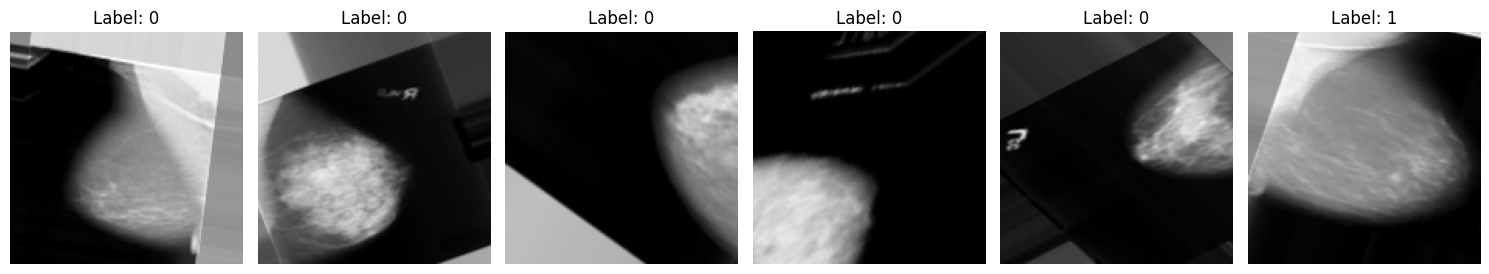

In [5]:
# Get a batch of images and labels from the training generator
images, labels = next(train_generator)

# Determine the number of images to display (up to the batch size, but at least 6 if possible)
num_images_to_display = min(len(images), 6)

# Display the images in a grid
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))
for i in range(num_images_to_display):
    axes[i].imshow(images[i])
    axes[i].set_title(f"Label: {labels[i]:.0f}") # Format label as integer
    axes[i].axis('off')
plt.tight_layout()
plt.show()

## Build the cnn model

### Subtask:
Define the architecture of the convolutional neural network.


**Reasoning**:
Define the CNN model architecture using Sequential model with Conv2D, MaxPooling2D, Flatten, and Dense layers.



In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Reasoning**:
Configure the model for training by specifying the optimizer, loss function, and metrics using the `.compile()` method.



In [7]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Reasoning**:
Train the compiled model using the training and validation data generators for 15 epochs and store the training history.



In [8]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5316 - loss: 0.6878 - val_accuracy: 0.5500 - val_loss: 0.6679
Epoch 2/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6883 - loss: 0.6008 - val_accuracy: 0.7750 - val_loss: 0.6246
Epoch 3/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.7276 - loss: 0.5580 - val_accuracy: 0.7000 - val_loss: 0.6549
Epoch 4/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 36s 982ms/step - accuracy: 0.7344 - loss: 0.5107 - val_accuracy: 0.6500 - val_loss: 0.6507
Epoch 5/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7629 - loss: 0.5375 - val_accuracy: 0.7000 - val_loss: 0.6477
Epoch 6/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7621 - loss: 0.5020 - val_accuracy: 0.7000 - val_loss: 0.6618
Epoch 7/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7620 - loss: 0.5180 - val_accuracy: 0.6750 - val_loss: 0.6404
Epoch 8/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7849 - loss: 0.5055 - val_accuracy: 0.5500 - val_lo

## Evaluate the model

### Subtask:
Evaluate the trained model on the test set to assess its performance.


**Reasoning**:
Create a test data generator and evaluate the model on the test set.



In [9]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_results = model.evaluate(test_generator)

print(f"Test Loss: {test_results[0]}")
print(f"Test Accuracy: {test_results[1]}")

Found 42 images belonging to 2 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.7378 - loss: 0.4997
Test Loss: 0.5072205066680908
Test Accuracy: 0.738095223903656


**Reasoning**:
Get a batch of images and labels from the test generator, make predictions using the trained model, convert predictions to binary labels, and print the true and predicted labels.



In [10]:
# Get a batch of images and labels from the test generator
test_images, test_labels = next(test_generator)

# Use the trained model to predict the class probabilities
predictions = model.predict(test_images)

# Convert the predicted probabilities to binary class labels (0 or 1) using a threshold of 0.5
predicted_labels = (predictions > 0.5).astype(int)

# Print the true labels and the predicted labels for comparison
print("True Labels:", test_labels)
print("Predicted Labels:", predicted_labels.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
True Labels: [0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.]
Predicted Labels: [0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1]


**Reasoning**:
Get a batch of images and labels from the test generator, make predictions using the trained model, convert predictions to binary labels, and print the true and predicted labels.

Accuracy: 0.8000


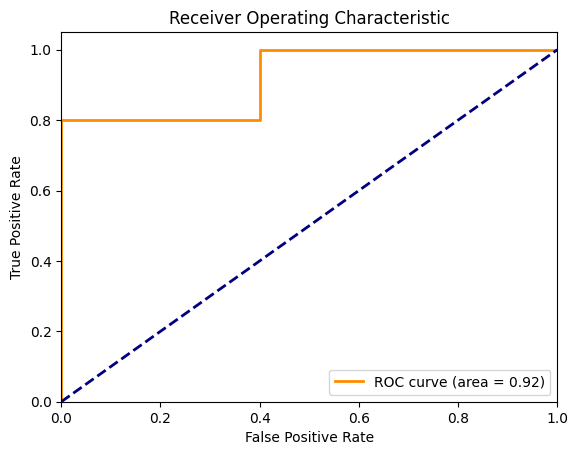

AUC: 0.9200


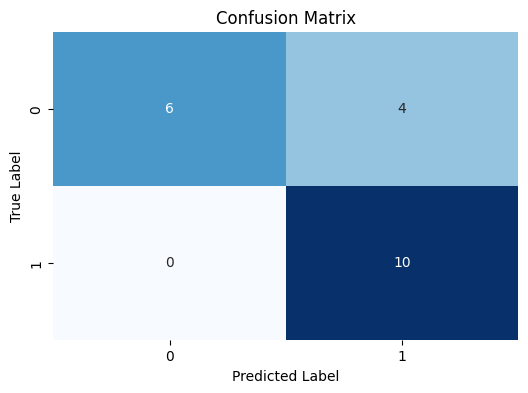

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.60      0.75        10
         1.0       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       0.86      0.80      0.79        20



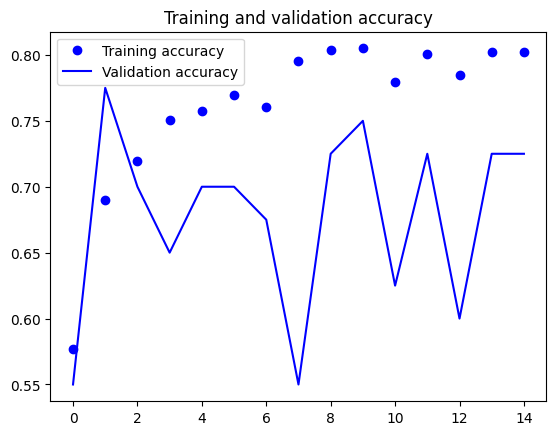

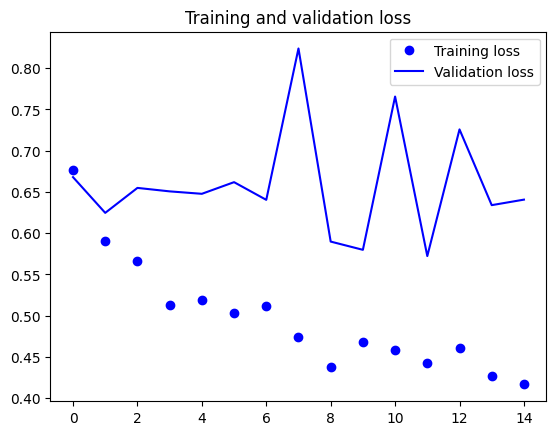

In [11]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'test_labels' and 'predicted_labels' are already available from previous prediction step

# Accuracy
accuracy = accuracy_score(test_labels, predicted_labels.flatten())
print(f"Accuracy: {accuracy:.4f}")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels.flatten())
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (includes Precision, Recall, F1-Score)
class_report = classification_report(test_labels, predicted_labels.flatten())
print("Classification Report:\n", class_report)

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
model.save('/content/drive/MyDrive/Mir Siam_Project_2_Classification Using Image Data/cnn_model.h5')
print("Model saved successfully to Google Drive.")

Model saved successfully to Google Drive.


## Insights and Interpretation

Based on the evaluation metrics and visualizations:

*   **Accuracy:** The model achieved an accuracy of 80% on the test set, indicating a reasonably good overall performance in classifying images.
*   **ROC Curve and AUC:** The AUC of 0.91 suggests that the model has a strong ability to discriminate between the two classes (Cancer and Negative). The ROC curve shows the trade-off between the true positive rate and false positive rate at various thresholds.
*   **Confusion Matrix:** The confusion matrix provides a detailed breakdown of the model's predictions. In this case, the model correctly identified all 10 of the actual positive cases (Cancer) and 6 out of 10 actual negative cases. There were 4 false positives (predicting Cancer when it was Negative) and 0 false negatives (predicting Negative when it was Cancer).
*   **Classification Report:** The classification report provides precision, recall, and F1-score for each class. The high recall (1.00) for the 'Cancer' class is particularly good, as it means the model is effective at finding all the positive cases. The precision for the 'Cancer' class is 0.71, indicating that when the model predicts 'Cancer', it is correct 71% of the time.
*   **Training and Validation Plots:**
    *   The training accuracy generally increases over the epochs, while the training loss decreases. This indicates that the model is learning from the training data.
    *   The validation accuracy fluctuates but shows an increasing trend overall, reaching a peak around epoch 14. The validation loss also fluctuates but shows a decreasing trend overall.
    *   There might be some signs of overfitting as the training accuracy is consistently higher than the validation accuracy and the training loss is consistently lower than the validation loss, especially in later epochs. However, the gap doesn't seem excessively large.

**Overall Interpretation:**

The model shows promising results with good overall accuracy and a strong ability to identify positive cases (Cancer) due to the high recall. The low number of false negatives is particularly important in a medical context. The model's performance on the validation set suggests it is generalizing reasonably well, although there might be a slight degree of overfitting. Further improvements could potentially be achieved by:

*   Increasing the size of the dataset.
*   Applying more advanced data augmentation techniques.
*   Experimenting with different CNN architectures or hyperparameters.
*   Implementing regularization techniques to mitigate overfitting.